# 2016 Election Campaign Contributions
##### SmirkyGraphs -  [Website](https://smirkygraphs.github.io/) - [Github](https://github.com/SmirkyGraphs/Python-Notebooks)
<hr>

In [1]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from __future__ import division
import datetime

#use to get info from web
import requests

#stringIO to work with csv
from StringIO import StringIO

In [2]:
doner_df = pd.read_csv('Election_Doner_Data.csv', index_col=False, dtype={
'cmte_id': object, 'cand_id': object, 'cand_nm': object, 'contbr_nm': object, 'contbr_city': object, 'contbr_st': object, 
'contbr_zip': object, 'contbr_employer': object, 'contbr_occupation': object, 'contb_receipt_amt': float, 
'contb_receipt_dt': object, 'receipt_desc': object,'memo_cd': object, 'memo_text': object, 'form_tp': object, 
'file_num': int, 'tran_id': object, 'election_tp': object})

In [3]:
doner_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440252 entries, 0 to 7440251
Data columns (total 18 columns):
cmte_id              object
cand_id              object
cand_nm              object
contbr_nm            object
contbr_city          object
contbr_st            object
contbr_zip           object
contbr_employer      object
contbr_occupation    object
contb_receipt_amt    float64
contb_receipt_dt     object
receipt_desc         object
memo_cd              object
memo_text            object
form_tp              object
file_num             int32
tran_id              object
election_tp          object
dtypes: float64(1), int32(1), object(16)
memory usage: 993.4+ MB


In [4]:
doner_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,100.0,08-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1074981,P2016


#### As we can see there are 7,440,252 rows 18 columns and some null values<br>This gives us some useful info like the canidates name, contributors name, state, zip, eomployer, occupation, ammount and date

In [5]:
doner_df['contb_receipt_amt'].value_counts()

 25.00      1051165
 50.00       885354
 100.00      785577
 10.00       637262
 5.00        434221
 15.00       327665
 27.00       313461
 250.00      278865
 35.00       150087
 20.00       142855
 200.00      133909
 40.00       125064
 19.00       120481
 500.00      118679
 80.00       103486
 8.00        102787
 75.00        95509
 2700.00      90866
 28.00        85847
 1000.00      83443
 3.00         76709
 38.00        69111
 1.00         57444
 30.00        55169
 150.00       50352
 37.00        39914
 400.00       34955
 16.00        27659
 7.00         25740
 300.00       23758
             ...   
 227.93           1
-1564.34          1
-8.70             1
 102.26           1
 102.24           1
 9.66             1
 420.48           1
 183.46           1
 225.57           1
 1730.00          1
 960.56           1
 225.82           1
-975.44           1
-5700.00          1
 224.93           1
-133.55           1
-79.05            1
 33.46            1
 1732.00          1


#### The top donation ammount was $25 and donations tend to stick around even values, 5, 10, 25, 50, 100<br><br> We can also see that there are some negitive values, this is because the FEC also tracks Refunds, these can be Excessive Contributions, Illegal Contributions or Prohibited Contributions we don't need those because we only want too see how much a canidate raises

In [6]:
# removing negitives from our main dataframe
doner_df = doner_df[doner_df.contb_receipt_amt > 0]

#### Next we will clean up the data a tad by adding party affiliation

In [7]:
# Get a list of all canidates
canidates = doner_df.cand_nm.unique()
canidates

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", 'Paul, Rand',
       'Clinton, Hillary Rodham', 'Sanders, Bernard', 'Fiorina, Carly',
       'Huckabee, Mike', 'Pataki, George E.', "O'Malley, Martin Joseph",
       'Graham, Lindsey O.', 'Bush, Jeb', 'Trump, Donald J.',
       'Jindal, Bobby', 'Christie, Christopher J.', 'Walker, Scott',
       'Stein, Jill', 'Webb, James Henry Jr.', 'Kasich, John R.',
       'Gilmore, James S III', 'Lessig, Lawrence', 'Johnson, Gary',
       'McMullin, Evan'], dtype=object)

In [8]:
# dictionary of party affiliation
party_map = {'Rubio, Marco': 'Republican',
            'Santorum, Richard J.': 'Republican',
            'Perry, James R. (Rick)': 'Republican',
            'Carson, Benjamin S.': 'Republican',
            "Cruz, Rafael Edward 'Ted'": 'Republican',
            'Paul, Rand': 'Republican',
            'Clinton, Hillary Rodham': 'Democrat',
            'Sanders, Bernard': 'Democrat',
            'Fiorina, Carly': 'Republican',
            'Huckabee, Mike': 'Republican',
            'Pataki, George E.': 'Republican',
            "O'Malley, Martin Joseph": 'Democrat',
            'Graham, Lindsey O.': 'Republican',
            'Bush, Jeb': 'Republican',
            'Trump, Donald J.': 'Republican',
            'Jindal, Bobby': 'Republican',
            'Christie, Christopher J.': 'Republican',
            'Walker, Scott': 'Republican',
            'Stein, Jill': '3rd Party',
            'Webb, James Henry Jr.': 'Democrat',
            'Kasich, John R.': 'Republican',
            'Gilmore, James S III': 'Republican',
            'Lessig, Lawrence': 'Democrat',
            'Johnson, Gary': '3rd Party',
            'McMullin, Evan': '3rd Party'}

# creating a party column and mapping party to canidate
doner_df['Party'] = doner_df.cand_nm.map(party_map)

In [9]:
doner_df.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,Party
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016,Republican


In [10]:
# A count of how many donations were to each campaign
doner_df.groupby("cand_nm")["contb_receipt_amt"].count().sort_values()

cand_nm
Gilmore, James S III              84
Pataki, George E.                343
Jindal, Bobby                    761
Webb, James Henry Jr.            800
Perry, James R. (Rick)           875
Lessig, Lawrence                1337
Santorum, Richard J.            1675
McMullin, Evan                  2569
Graham, Lindsey O.              3926
O'Malley, Martin Joseph         5250
Christie, Christopher J.        5838
Huckabee, Mike                  6360
Walker, Scott                   6656
Stein, Jill                    11014
Johnson, Gary                  13400
Kasich, John R.                25212
Fiorina, Carly                 27536
Bush, Jeb                      28038
Paul, Rand                     32196
Rubio, Marco                   99259
Carson, Benjamin S.           244904
Cruz, Rafael Edward 'Ted'     541088
Trump, Donald J.              762871
Sanders, Bernard             2047595
Clinton, Hillary Rodham      3471128
Name: contb_receipt_amt, dtype: int64

In [11]:
top_doner = doner_df[['contbr_nm','contb_receipt_amt']].copy()
top_doner = top_doner.sort_values(by='contb_receipt_amt',ascending=False)

In [12]:
top_doner.head(10)

,contbr_nm,contb_receipt_amt
3239378,HILLARY VICTORY FUND - UNITEMIZED,12777705.58
3274161,HILLARY VICTORY FUND - UNITEMIZED,7402361.45
3224394,HILLARY VICTORY FUND - UNITEMIZED,6358481.89
3284270,HILLARY VICTORY FUND - UNITEMIZED,4904860.51
3379521,HILLARY VICTORY FUND - UNITEMIZED,4575438.56
3447482,HILLARY VICTORY FUND - UNITEMIZED,4560967.14
3484760,HILLARY VICTORY FUND - UNITEMIZED,4126693.23
3364742,HILLARY VICTORY FUND - UNITEMIZED,3686373.26
3369437,HILLARY VICTORY FUND - UNITEMIZED,3600489.08
3384894,HILLARY VICTORY FUND - UNITEMIZED,2976430.32


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000007EB6BF28>]], dtype=object)

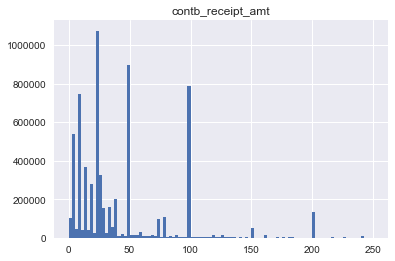

In [13]:
com_don = top_doner[top_doner < 250]

com_don.hist(bins=100)

In [14]:
# The Total the canidate raised
cand_amount = doner_df.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values()

i = 0

for don in cand_amount:
    print '%s raised %.0f' %(cand_amount.index[i],don)
    i += 1

Gilmore, James S III raised 105561
Webb, James Henry Jr. raised 439246
Pataki, George E. raised 507349
McMullin, Evan raised 553408
Lessig, Lawrence raised 624220
Santorum, Richard J. raised 1139075
Perry, James R. (Rick) raised 1189868
Jindal, Bobby raised 1275393
Stein, Jill raised 2493803
Huckabee, Mike raised 2499978
Johnson, Gary raised 3584074
O'Malley, Martin Joseph raised 4064948
Graham, Lindsey O. raised 4632862
Paul, Rand raised 6314863
Walker, Scott raised 6601235
Fiorina, Carly raised 6693845
Christie, Christopher J. raised 8214280
Kasich, John R. raised 14752678
Carson, Benjamin S. raised 29014000
Bush, Jeb raised 33773733
Rubio, Marco raised 40542078
Cruz, Rafael Edward 'Ted' raised 69752747
Sanders, Bernard raised 97572014
Trump, Donald J. raised 127578631
Clinton, Hillary Rodham raised 521951750


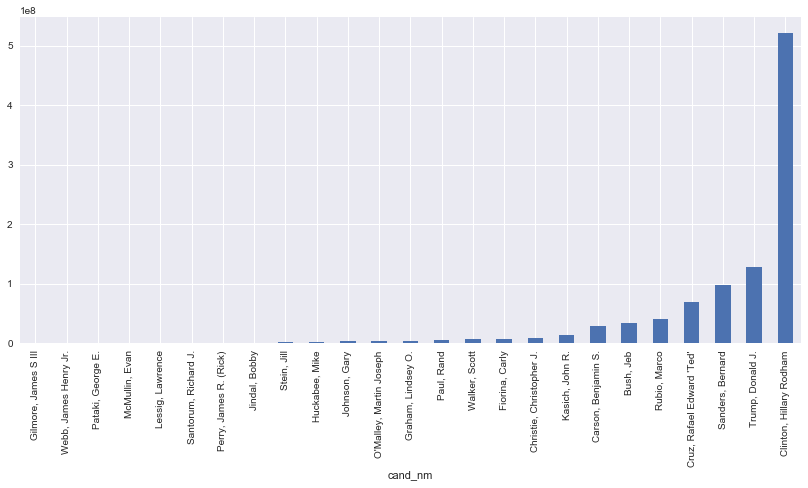

In [15]:
cand_amount.plot(kind='bar',figsize=(14,6))

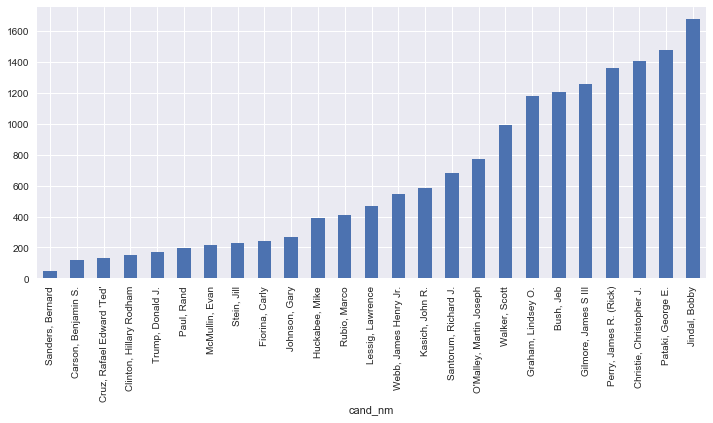

In [16]:
# Average
avg_donations = doner_df.groupby("cand_nm").mean().sort_values(by="contb_receipt_amt")
avg_donations["contb_receipt_amt"].plot(kind="bar",figsize=(12,5))

#### Thats a bit easier to see and understand just how much Hillary out funded everyone

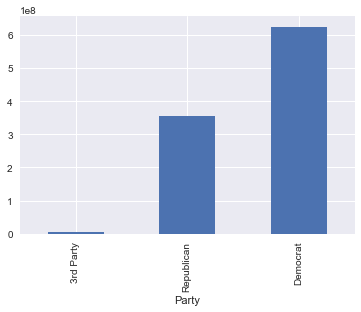

In [17]:
doner_df.groupby('Party')['contb_receipt_amt'].sum().sort_values().plot(kind='bar')

#### While there were a ton of Republican canidates the Democrats specifically Hillary significantly out raised them in total
<hr>

## Lets look at donations by Careers

In [18]:
# Pivot table much like in excel
job_pt = doner_df.pivot_table('contb_receipt_amt', index='contbr_occupation', columns = 'Party', aggfunc='sum')

In [19]:
job_pt["Total"] = job_pt.sum(axis=1)
job_pt.head()

Party,3rd Party,Democrat,Republican,Total
contbr_occupation,,,,
ADMINISTRATIVE ASSISTANT,NaN,150.00,NaN,150.00
ARTIST,NaN,100.00,NaN,100.00
ATTORNEY,NaN,2100.50,NaN,2100.50
CAREER ADVISOR,NaN,50.00,NaN,50.00
CERTIFIED REGISTERED NURSE ANESTHETIS,NaN,2927.72,NaN,2927.72


In [20]:
job_pt = job_pt.sort_values(by="Total",ascending=True)

In [21]:
job_pt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127268 entries, SERVICE SALES REPRESENTATIVE to RETIRED
Data columns (total 4 columns):
3rd Party     3290 non-null float64
Democrat      79117 non-null float64
Republican    61340 non-null float64
Total         127268 non-null float64
dtypes: float64(4)
memory usage: 4.9+ MB


#### Okay so this has 127,268 'jobs' but includes blanks errors and duplicates so we clearly dont want all<br><br>Lets try grouping by ammount donated and see if that gets us some cleaner information lets try 2 million

In [22]:
job_pt = job_pt[job_pt['Total'] > 2000000]

In [23]:
# 44 jobs are over $2,000,000
job_pt.shape

(44, 4)

In [24]:
job_pt

Party,3rd Party,Democrat,Republican,Total
contbr_occupation,,,,
INVESTMENTS,18884.75,6.567254e+05,1.353727e+06,2.029337e+06
EDUCATOR,9771.80,1.883753e+06,1.672757e+05,2.060800e+06
ENTREPRENEUR,17053.00,1.285851e+06,8.152827e+05,2.118187e+06
BANKER,6304.70,1.098698e+06,1.014728e+06,2.119731e+06
ARCHITECT,12008.49,1.735440e+06,4.588543e+05,2.206302e+06
FARMER,10176.55,5.318559e+05,1.692710e+06,2.234742e+06
PSYCHOLOGIST,12250.00,2.117766e+06,1.345607e+05,2.264577e+06
CPA,21170.95,1.128238e+06,1.308780e+06,2.458188e+06
MARKETING,13616.45,1.986465e+06,5.504764e+05,2.550558e+06


In [25]:
# remove these rows
job_pt.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED', 'RETIRED', 
             'CONDUIT TOTAL LISTED IN AGG. FIELD'],axis=0,inplace=True)

#combine like rows
job_pt.loc['SELF-EMPLOYED'] = job_pt.loc['SELF-EMPLOYED'] + job_pt.loc['SELF EMPLOYED']
#remove self employed without dash
job_pt.drop('SELF EMPLOYED',inplace=True)

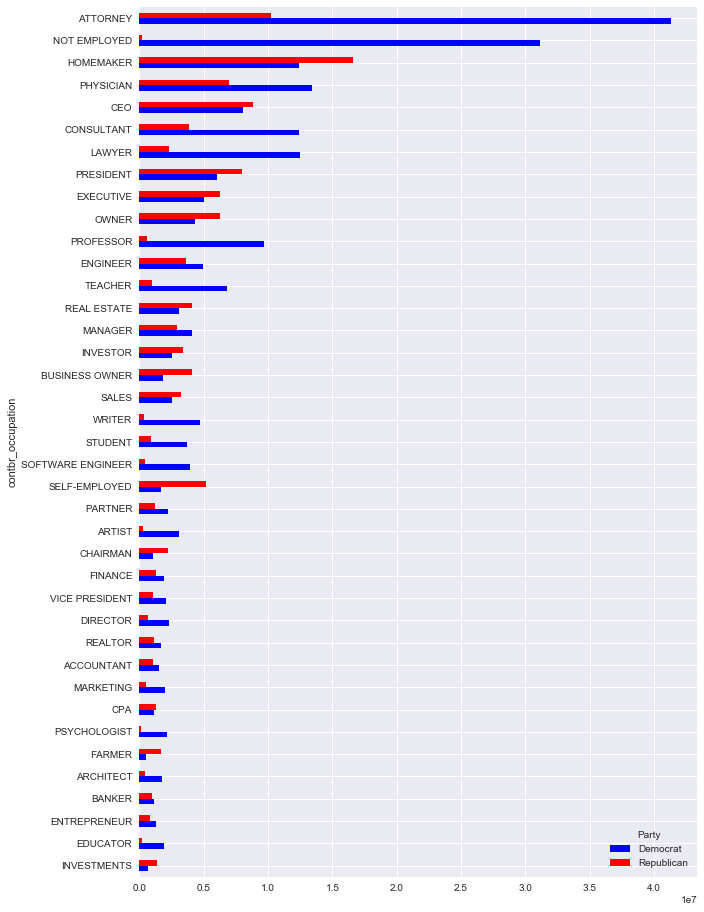

In [26]:
job_pt[['Democrat','Republican']].plot(kind='barh',figsize=(10,16),cmap='bwr')

#### Here you can see the breakdown by job and how they donate differently this looks at sum<br> but how about if we look at how many people donated instead of the ammount they did

In [27]:
# Pivot table much like in excel
job_pt = doner_df.pivot_table('contb_receipt_amt', index='contbr_occupation', columns = 'Party', aggfunc='count')

In [28]:
job_pt["Total"] = job_pt.sum(axis=1)
job_pt.head()

Party,3rd Party,Democrat,Republican,Total
contbr_occupation,,,,
ADMINISTRATIVE ASSISTANT,NaN,3.0,NaN,3.0
ARTIST,NaN,1.0,NaN,1.0
ATTORNEY,NaN,17.0,NaN,17.0
CAREER ADVISOR,NaN,1.0,NaN,1.0
CERTIFIED REGISTERED NURSE ANESTHETIS,NaN,44.0,NaN,44.0


In [29]:
job_pt = job_pt.sort_values(by="Total",ascending=True)

In [30]:
job_pt = job_pt[job_pt['Total'] > 15000]

In [31]:
job_pt.shape

(46, 4)

In [32]:
job_pt.drop(['DISABLED', 'INFORMATION REQUESTED PER BEST EFFORTS', 'RETIRED', 'INFORMATION REQUESTED',
             'CONDUIT TOTAL LISTED IN AGG. FIELD'],axis=0,inplace=True)

job_pt.loc['SELF-EMPLOYED'] = job_pt.loc['SELF-EMPLOYED'] + job_pt.loc['SELF EMPLOYED']
job_pt.loc['REGISTERED NURSE'] = job_pt.loc['REGISTERED NURSE'] + job_pt.loc['RN']
job_pt.loc['BUSINESS OWNER'] = job_pt.loc['BUSINESS OWNER'] + job_pt.loc['OWNER']

job_pt.drop('SELF EMPLOYED', inplace=True)
job_pt.drop('RN', inplace=True)
job_pt.drop('OWNER', inplace=True)

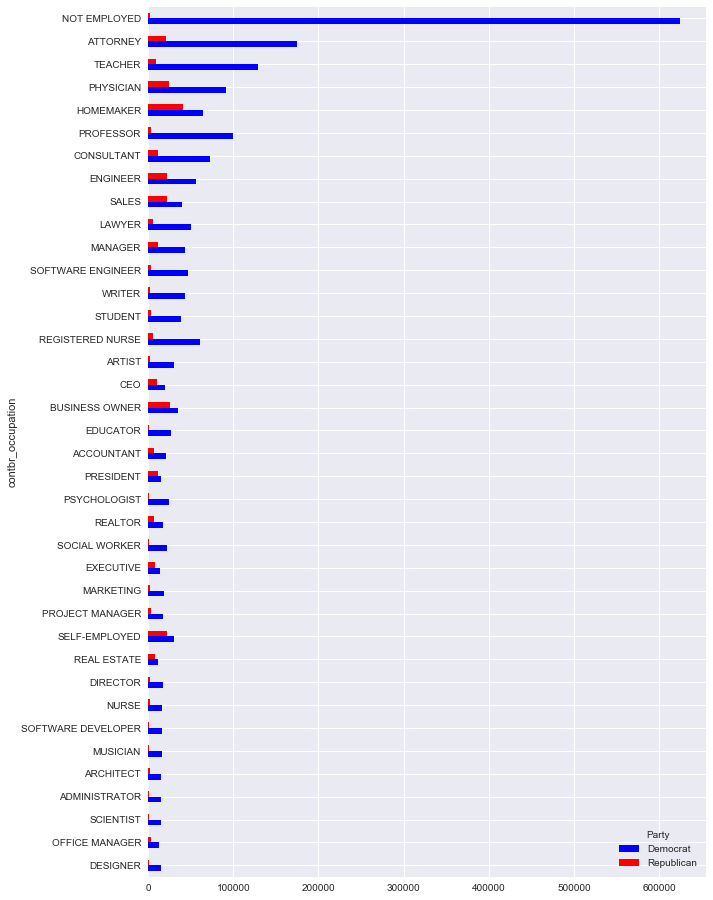

In [33]:
job_pt[['Democrat','Republican']].plot(kind='barh',figsize=(10,16),cmap='bwr')

#### Here you can see there was a lot more Not employed then there was Attornies <br>but if you look at the previous graph of sum donated Attornies have a bit more spending money to give away

<hr>
## Looking At Employer

In [34]:
employer_df = doner_df.pivot_table('contb_receipt_amt',index='contbr_employer',columns = 'Party',aggfunc='sum')

In [35]:
employer_df.shape

(398017, 3)

In [36]:
# once again graphing 398,017 different companies will not only look horrible, but take forever
employer_df = employer_df[employer_df.sum(1) > 350000]

In [37]:
employer_df.shape

(44, 3)

In [38]:
# Thats better
employer_df

Party,3rd Party,Democrat,Republican
contbr_employer,,,
APPLE INC.,2390.27,6.157492e+05,1.691403e+04
AT&T,1599.00,3.930897e+05,8.445015e+04
BANK OF AMERICA,989.00,3.137584e+05,8.756927e+04
CIVIC VOLUNTEER,NaN,NaN,4.270666e+05
COLUMBIA UNIVERSITY,540.00,5.088942e+05,1.585360e+04
COVINGTON & BURLING LLP,1000.00,3.371457e+05,2.469000e+04
DLA PIPER LLP,NaN,3.859019e+05,5.050000e+03
FACEBOOK,4100.00,4.880039e+05,2.884904e+04
GOLDMAN SACHS,NaN,2.737989e+05,4.441873e+05


In [39]:
employer_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED', 'RETIRED', 
                  'TWICE REQUESTED NOT YET RECEIVED'],axis=0,inplace=True)
# combine like rows
employer_df.loc['SELF-EMPLOYED'] = employer_df.loc['SELF-EMPLOYED'] + employer_df.loc['SELF EMPLOYED'] + employer_df.loc['SELF']
employer_df.loc['NOT EMPLOYED'] = employer_df.loc['NOT EMPLOYED'] + employer_df.loc['NONE']
# remove self employed without dash
employer_df.drop('SELF EMPLOYED',inplace=True)
employer_df.drop('SELF',inplace=True)
employer_df.drop('NONE',inplace=True)
# These were far to large to allow us to see anything else
employer_df.drop('HOMEMAKER',inplace=True)
employer_df.drop('NOT EMPLOYED',inplace=True)
employer_df.drop('SELF-EMPLOYED',inplace=True)

In [40]:
employer_df["Total"] = employer_df.sum(axis=1)
employer_df = employer_df.sort_values(by="Total",ascending=True)
employer_df.head()

Party,3rd Party,Democrat,Republican,Total
contbr_employer,,,,
PAUL WEISS RIFKIND WHARTON & GARRISON,NaN,345281.25,6200.00,351481.25
LATHAM & WATKINS LLP,NaN,335840.62,17743.00,353583.62
UCLA,1000.0,332189.88,23312.97,356502.85
COVINGTON & BURLING LLP,1000.0,337145.72,24690.00,362835.72
SKADDEN ARPS SLATE MEAGHER & FLOM LLP,NaN,365565.76,420.13,365985.89


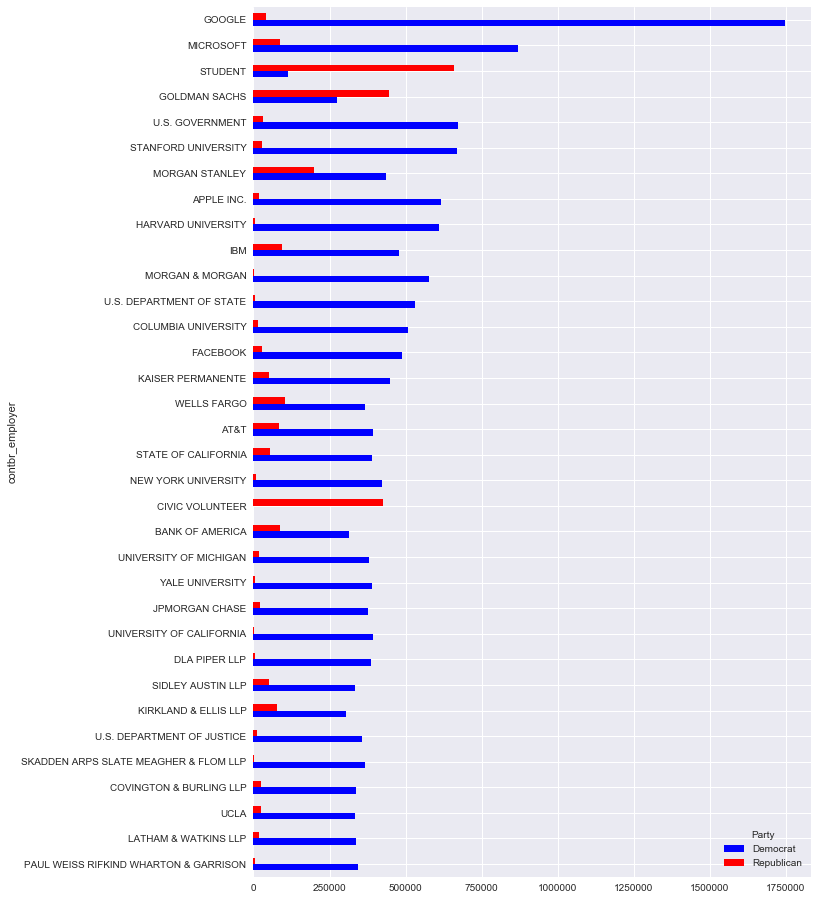

In [41]:
employer_df[['Democrat','Republican']].plot(kind='barh',figsize=(10,16),cmap='bwr')

<hr>
## Lets move on to States

In [42]:
state_df = doner_df.pivot_table('contb_receipt_amt',index='contbr_st',columns = 'Party',aggfunc='sum')

In [43]:
state_df.head()

Party,3rd Party,Democrat,Republican
contbr_st,,,
20,NaN,NaN,175.00
30,NaN,NaN,25.00
AA,250.0,42749.35,2474.07
AB,NaN,4493.10,NaN
AE,5987.7,172202.35,37958.55


In [44]:
state_df.drop(['20','30','FF','FR','GU','IS','LO','MP','ON','PR','SI','VI','XX','AS','AU','BC','BR','EN','JA',
'LE','SW','U*','UK','AA','BU','PU','SA','TE','ZZ','AB','BA','BE','CH','DU','E','EU','FM','GR','HE','KE','LI','MB',
'NB','NL','NO','NS','OS','QC','SH','SK','SO','ST','TO','W.','GE','N.','C','PW','AE','AM','AP','QB'],inplace=True)

In [45]:
state_df["Total"] = state_df.sum(axis=1)
state_df = state_df.sort_values(by="Total",ascending=True)
state_df.head()

Party,3rd Party,Democrat,Republican,Total
contbr_st,,,,
ND,2875.00,327070.57,571892.83,901838.40
SD,3504.00,521135.46,708679.05,1233318.51
DE,6217.00,977554.76,604862.65,1588634.41
AK,22036.86,972811.97,810857.98,1805706.81
WY,14072.50,572265.52,1224614.66,1810952.68


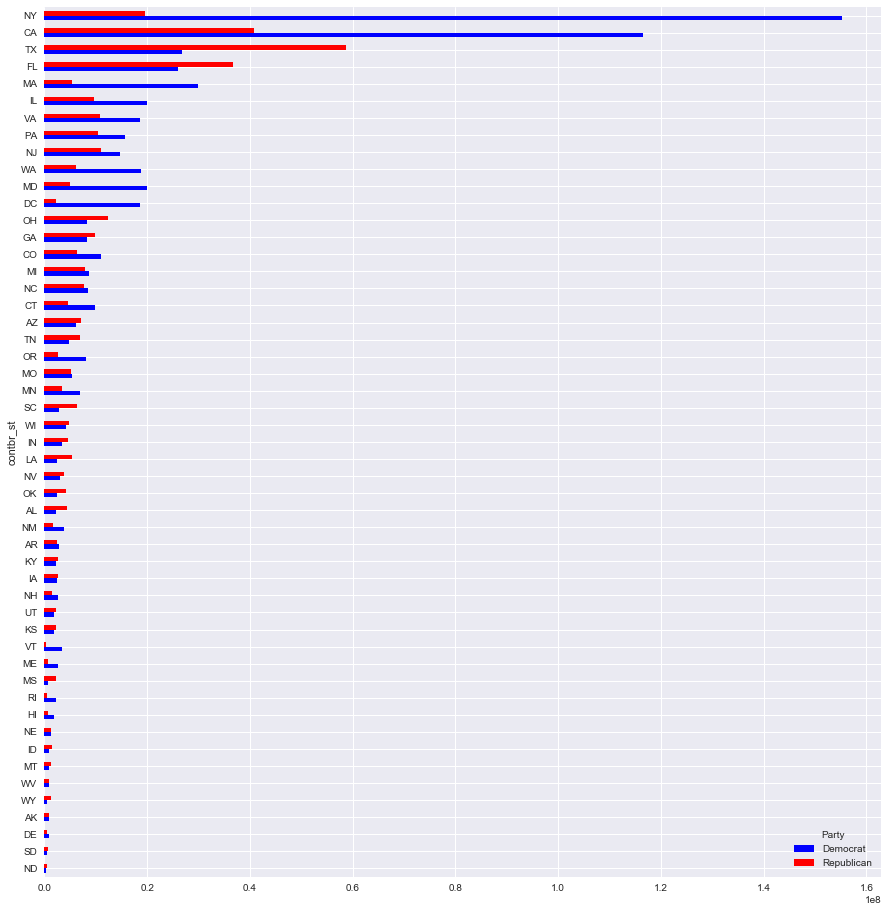

In [46]:
state_df[['Democrat','Republican']].plot(kind='barh',figsize=(15,16),cmap='bwr')

<hr>
## Cleaning Data for Rhode Island

In [47]:
RI_df = doner_df[doner_df.contbr_st == 'RI']

In [48]:
RI_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,Party
83179,C00458844,P60006723,"Rubio, Marco","BLOUNT, F. NELSON",BARRINGTON,RI,028061841,BLOUNT FINE FOODS,PRESIDENT,250.0,02-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.969678,P2016,Republican
83180,C00458844,P60006723,"Rubio, Marco","COOPER, DAVID",NEWPORT,RI,028402004,U.S. NAVAL WAR COLLEGE,PROFESSOR,100.0,21-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1026442,P2016,Republican
83181,C00458844,P60006723,"Rubio, Marco","DEYOE, RONALD A. CAPT.",NEWPORT,RI,028401528,RETIRED,RETIRED,50.0,18-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1018752,P2016,Republican
83182,C00458844,P60006723,"Rubio, Marco","FOGG, DAVID",WICKFORD,RI,028525103,AVC,SEMI-RETIRED,25.0,14-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1010821,P2016,Republican
83183,C00458844,P60006723,"Rubio, Marco","FOGG, DAVID",WICKFORD,RI,028525103,AVC,SEMI-RETIRED,25.0,18-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1017099,P2016,Republican


In [49]:
RI_df.shape

(25918, 19)

In [50]:
RI_df.contbr_city.unique()

array(['BARRINGTON', 'NEWPORT', 'WICKFORD', 'WAKEFIELD', 'PORTSMOUTH',
       'WEST WARWICK', 'NARRAGANSETT', 'EAST GREENWICH', 'PROVIDENCE',
       'SAUNDERSTOWN', 'LITTLE COMPTON', 'CHARLESTOWN', 'EAST PROVIDENCE',
       'WARWICK', 'MIDDLETOWN', 'TIVERTON', 'KINGSTON', 'SMITHFIELD',
       'WOONSOCKET', 'WESTERLY', 'RUMFORD', 'NORTH PROVIDENCE',
       'NORTH SMITHFIELD', 'FOSTER', 'COVENTRY', 'EXETER', 'LINCOLN',
       'HOPE VALLEY', 'CUMBERLAND', 'CHEPACHET', 'ASHAWAY', 'PAWTUCKET',
       'NORTH KINGSTOWN', 'GREENE', 'BRISTOL', 'N SCITUATE', 'GREENVILLE',
       'NORTH SCITUATE', 'WYOMING', 'WCKFORD', 'WEST GREENWICH',
       'WEST KINGSTON', 'CRANSTON', 'RIVERSIDE', 'N SMITHFIELD',
       'WEST WARWWICK', 'E. GREENWICH', 'JAMESTOWN', 'N KINGSTOWN',
       'WARREN', 'BLOCK ISLAND', 'JOHNSTON', 'HOPKINTON', 'HOPE',
       'SOUTH KINGSTOWN', 'SCITUATE', 'E GREENWICH', 'CENTRAL FALLS',
       'PASCOAG', 'CAROLINA', 'MANVILLE', 'RICHMOND', 'ADAMSVILLE',
       'PRUDENCE ISL', 'MAPLE

#### Well.... aparently there is 140 "cities" in RI like previously we have to remove data we don't need like those who live in 'CLINTON' RI<br><br>Aswell as combine like values, like the man who lives in SMITHFIELD and those who live in 'SMITHFIELDSMITHFIELD'<br><br> but first... lets see how many live in each of these 140 cities

In [51]:
RI_df['contbr_city'].value_counts()

PROVIDENCE                  5428
CRANSTON                    1916
WARWICK                     1548
NEWPORT                     1286
NORTH KINGSTOWN             1084
BARRINGTON                  1002
WAKEFIELD                    917
PAWTUCKET                    854
EAST GREENWICH               773
BRISTOL                      737
RIVERSIDE                    597
CUMBERLAND                   553
WESTERLY                     551
NARRAGANSETT                 507
PORTSMOUTH                   507
WEST WARWICK                 455
JAMESTOWN                    435
MIDDLETOWN                   398
COVENTRY                     392
WEST KINGSTON                382
NORTH PROVIDENCE             362
LINCOLN                      355
WARREN                       291
CHARLESTOWN                  288
TIVERTON                     286
BLOCK ISLAND                 284
WOONSOCKET                   264
LITTLE COMPTON               252
SAUNDERSTOWN                 233
JOHNSTON                     202
          

#### Okay so a lot of the typos/wrong places are just 1-3 people, we could just remove them and it woulnd't effect our data much, but instead lets add them <br><br> I found ~23 that were not actual places in RI at all<br>I want to convert the smaller towns into whatever big town/city they are part of

In [52]:
RI_df = RI_df[~RI_df['contbr_city'].isin(['CHAMBERSBURG', 'CLINTON', 'FAIR HAVEN', 'CLAREMORE', 'FTWORTH', 'HERMITAGE', 'HONOMU',
    'KIAWAH ISLAND', 'LAKE FOREST', 'MADISON', 'MIDDLEFIELD', 'PARIS', 'PERU', 'PITTSBURGH', 'POOLESVILLE', 'PORT ST LUCIE', 
    'POTTSTOWN', 'PREONZO', 'SALT LAKE CITY', 'SCOTTSDALE', 'SPARTANBURG', 'SPEARFISH', 'VACAVILLE', 'INFO REQUESTED',
    'REDMOND'])]

In [53]:
RI_df = RI_df.replace(['BARRINGTION'],'BARRINGTON')
RI_df = RI_df.replace(['GLENDALE','HARRISVILLE','MAPLEVILLE','OAKLAND','PASCOAG'],'BURRILLVILLE')
RI_df = RI_df.replace(['CAROLINA','CHARLESTON','CHARLESTOWN'],'CHARLESTOWN')
RI_df = RI_df.replace(['GREENE'],'COVENTRY')
RI_df = RI_df.replace(['E GREENWICH','E. GREENWICH','EAST GREENWICH, RI 02818'],'EAST GREENWICH')
RI_df = RI_df.replace(['E PROVIDENCE','EAST PROVIDENCE','ESAT PROVIDENCE','RIVERSIDE','RUMFORD'],'EAST PROVIDENCE')
RI_df = RI_df.replace(['CLAYVILLE'],'FOSTER')
RI_df = RI_df.replace(['CHAPACHET','CHEPACHET','HARMONY'],'GLOCESTER')
RI_df = RI_df.replace(['ASHAWAY','HOPE VALLEY','ROCKVILLE'],'HOPKINTON')
RI_df = RI_df.replace(['ALBION','FAIR LAWN','LINCON','MANVILLE'],'LINCOLN')
RI_df = RI_df.replace(['ADAMSVILLE','L. COMPTON','LITTLE COMPTO','MANVILLE'],'LITTLE COMPTON')
RI_df = RI_df.replace(['MIDDLETWON'],'MIDDLETOWN')
RI_df = RI_df.replace(['NARRAGANSETT','NARRAGONSETT','SAUNDERSTOWN','SAUNDERSTROWN','NARRAGANSET'],'NARRAGANSETT')
RI_df = RI_df.replace(['BLOCK ISLAND'],'NEW SHOREHAM')
RI_df = RI_df.replace(['N KINGSTOWN','N. KINGSTOWN','NO.KINGSTOWN','NORTH KING','SLOCUM','WCKFORD','WICKFORD'],'NORTH KINGSTOWN')
RI_df = RI_df.replace(['N PROVIDENCE','N. PROVIDENCE','N.PROV.','NO. PROVIDENCE','NORTHPROVIDENCE'],'NORTH PROVIDENCE')
RI_df = RI_df.replace(['FORESTDALE','N SMITHFIELD','SLATERSVILLE'],'NORTH SMITHFIELD')
RI_df = RI_df.replace(['PRUDENCE ISL'],'PORTSMOUTH')
RI_df = RI_df.replace(['SHANNOCK','WOOD RIVER JUNCTION','WYOMING'],'RICHMOND')
RI_df = RI_df.replace(['HOPE','N SCITUATE','N. SCITUATE','N.SCITUATE','NORTH SCITUATE'],'SCITUATE')
RI_df = RI_df.replace(['GREENVILLE','SMITHFIELDSMITHFIELD'],'SMITHFIELD')
RI_df = RI_df.replace(['KINGSTON','PEACE DALE','S KINGSTOWN','S. KINGSTOWN','SOUTH KINGSTOWN','WAKEFIELD','WEDT KINGSTON','WEST KINGSTON'],'SOUTH KINGSTOWN')
RI_df = RI_df.replace(['WARIWCK','WAWICK','WARWICK. RHODE ISLAND'],'WARWICK')
RI_df = RI_df.replace(['W GREENWICH','WSET GREENWICH'],'WEST GREENWICH')
RI_df = RI_df.replace(['WEST WARWWICK'],'WEST WARWICK')
RI_df = RI_df.replace(['BRADFORD'],'WESTERLY')

In [54]:
RI_df['contbr_city'].value_counts()

PROVIDENCE          5428
CRANSTON            1916
SOUTH KINGSTOWN     1754
WARWICK             1553
NEWPORT             1286
NORTH KINGSTOWN     1170
BARRINGTON          1003
EAST PROVIDENCE      968
PAWTUCKET            854
EAST GREENWICH       816
NARRAGANSETT         745
BRISTOL              737
WESTERLY             555
CUMBERLAND           553
PORTSMOUTH           509
LINCOLN              485
WEST WARWICK         456
JAMESTOWN            435
COVENTRY             419
MIDDLETOWN           399
NORTH PROVIDENCE     375
CHARLESTOWN          309
WARREN               291
NEW SHOREHAM         288
TIVERTON             286
SCITUATE             279
WOONSOCKET           264
LITTLE COMPTON       261
GLOCESTER            218
JOHNSTON             202
SMITHFIELD           196
NORTH SMITHFIELD     167
BURRILLVILLE         156
HOPKINTON            143
RICHMOND             132
FOSTER               125
WEST GREENWICH        73
EXETER                62
CENTRAL FALLS         20
Name: contbr_city, dtype:

#### Okay so now we got the data into major cities/towns next lets add counties

In [55]:
# dictionary of RI Counties
county_map = {'BARRINGTON': 'BRISTOL',
            'BRISTOL': 'BRISTOL',
            'BURRILLVILLE': 'PROVIDENCE',
            'CENTRAL FALLS': 'PROVIDENCE',
            'CHARLESTOWN': 'WASHINGTON',
            'COVENTRY': 'KENT',
            'CRANSTON': 'PROVIDENCE',
            'CUMBERLAND': 'PROVIDENCE',
            'EAST GREENWICH': 'KENT',
            'EAST PROVIDENCE': 'PROVIDENCE',
            'EXETER': 'WASHINGTON',
            'FOSTER': 'PROVIDENCE',
            'GLOCESTER': 'PROVIDENCE',
            'HOPKINTON': 'WASHINGTON',
            'JAMESTOWN': 'NEWPORT',
            'JOHNSTON': 'PROVIDENCE',
            'LINCOLN': 'PROVIDENCE',
            'LITTLE COMPTON': 'NEWPORT',
            'MIDDLETOWN': 'NEWPORT',
            'NARRAGANSETT': 'WASHINGTON',
            'NEWPORT': 'NEWPORT',
            'NEW SHOREHAM': 'WASHINGTON',
            'NORTH KINGSTOWN': 'WASHINGTON',
            'NORTH PROVIDENCE': 'PROVIDENCE',
            'NORTH SMITHFIELD': 'PROVIDENCE',
            'PAWTUCKET': 'PROVIDENCE',
            'PORTSMOUTH': 'NEWPORT',
            'PROVIDENCE': 'PROVIDENCE',
            'RICHMOND': 'WASHINGTON',
            'SCITUATE': 'PROVIDENCE',
            'SMITHFIELD': 'PROVIDENCE',
            'SOUTH KINGSTOWN': 'WASHINGTON',
            'TIVERTON': 'NEWPORT',
            'WARREN': 'BRISTOL',
            'WARWICK': 'KENT',
            'WESTERLY': 'WASHINGTON',
            'WEST GREENWICH': 'KENT',
            'WEST WARWICK': 'KENT',
            'WOONSOCKET': 'PROVIDENCE'}

# creating a party column and mapping party to canidate
RI_df['County'] = RI_df.contbr_city.map(county_map)

In [56]:
RI_df['County'].value_counts()

PROVIDENCE    12206
WASHINGTON     5158
KENT           3317
NEWPORT        3176
BRISTOL        2031
Name: County, dtype: int64

In [57]:
RI_df.to_csv('RI_Pres_Election_2016.csv')